In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,RocCurveDisplay,auc,precision_recall_fscore_support,precision_score
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,Binarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from feature_engine.wrappers import SklearnTransformerWrapper as TransformerWrapper



# New Candy Inference !
Now that we have our pipeline stored with all it's parameters we can use our model to infer the class from newly fed data.
For this we are going to use our stored newly created `infer-testx` and `infer-testy` csv files .


In [14]:
# load data 
test_x = pd.read_csv('../Datasets/infer-testx.csv')
test_y = pd.read_csv('../Datasets/infer-testy.csv')


print(test_x.head(2))
print(test_x.shape)
print(test_y.head(2))
print(test_y.shape)

   fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
0       0        0               0       0                 0     0    0   
1       1        0               0       0                 0     0    0   

   pluribus  sugarpercent  pricepercent  winpercent  
0         0         0.011         0.116   32.261086  
1         1         0.197         0.976   22.445341  
(7, 11)
   chocolate
0          0
1          0
(7, 1)


Now since we have made the feature selection process part of our pipeline in this project , we do not need to do anything else !
1. MinMaxScaler is being applied as part of our pipeline at step 1 
2. FeatureSelection is being applied as part of our pipeline at step 2 
3. ModelInference is being applied as part of our pipeline at step 3 

The only thing remaining is load out pipeline class and score new data !

In [11]:
our_pipeline = joblib.load('../Models-Transformers/chocolate-pipe.joblib')

Since we don't really know what features our new dataset will include, it can have many NaN values in columns where our train dataset did not have. A simple solution (though not always correct) is to just pass the new dataset through our pipeline and our imputers will take care of this. On the other hand we do not know  if our newly fed datast has any outliers that the imputers have not taken into account. In essence, we do not know if the new data will follow the distribution of our train_data and arguably the simple imputation methods we applied will not be able to tackle every possible scenario, especially since our train dataset is so freakin small! 

For now we are going to move forward with our pipeline and pass the new `infer-testx` and `infer-testy` through our pipeline.

In [12]:
y_pred = our_pipeline.predict(test_x)


prec,recall,fscore,_ = precision_recall_fscore_support(test_y,y_pred,pos_label=1,average='binary')
print(f"recall : {recall}")
print(f"precision : {prec}")
print(f"fscore : {fscore}")


recall : 1.0
precision : 1.0
fscore : 1.0


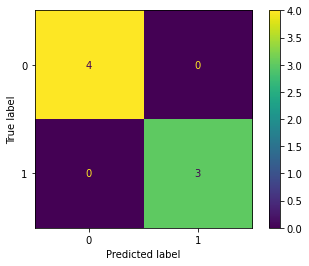

In [15]:
cm = confusion_matrix(test_y,y_pred,normalize=None)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=our_pipeline.named_steps['featuresel'].estimator_.classes_).plot()
plt.show()

YAY ! We get the correct answer. Now we are ready to predict everything .JK.
Next we are going to talk about packaging our model in order to be able to deploy it in an application.
